---
title: Visualization for Area Unit Data
author: Serge Rey
date: '2023-02-23'
execute: 
  enabled: true
format:
  html:
    theme:
      light: flatly
      dark: darkly
    toc: true
jupyter: python3
---

## Statistical Visualization of Area Unit Data

## Geovisualization

### Choropleths

#  Areal Unit Data

In [1]:
import geopandas
import libpysal

/tmp/ipykernel_38057/1387931905.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas


In [2]:
south = libpysal.examples.load_example('South')

In [3]:
libpysal.examples.explain('South')

In [4]:
south_gdf = geopandas.read_file(south.get_path('south.shp'))

<Axes: >

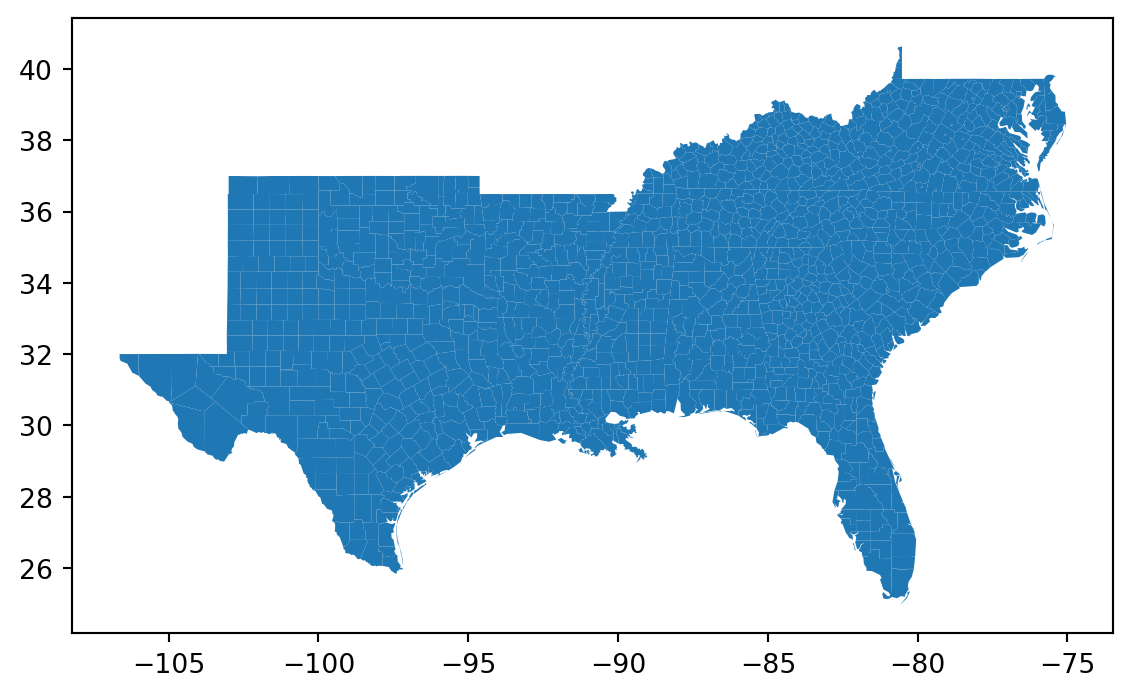

In [5]:
south_gdf.plot()

In [6]:
import seaborn

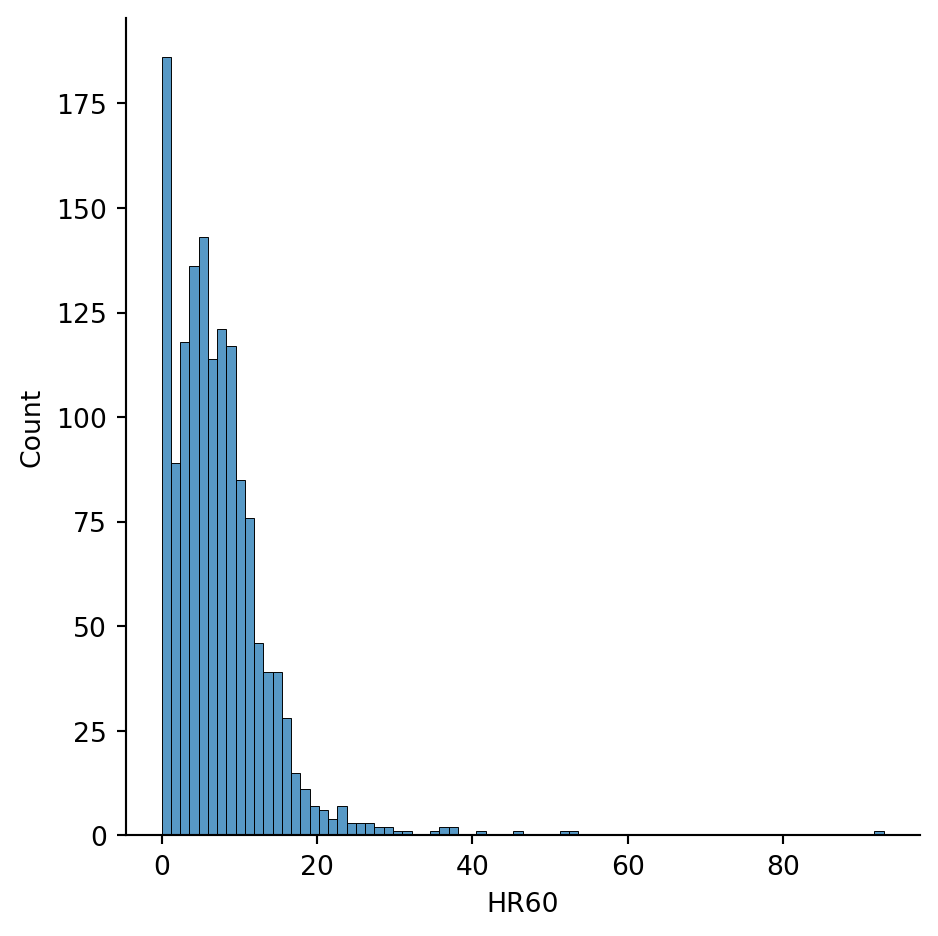

In [7]:
seaborn.displot(south_gdf, x='HR60')

In [8]:
south_gdf.explore(column='HR60')

In [9]:
south_gdf.HR60.describe()

count    1412.000000
mean        7.292144
std         6.421018
min         0.000000
25%         3.213471
50%         6.245125
75%         9.956272
max        92.936803
Name: HR60, dtype: float64

In [10]:
south_gdf.plot(column='HR60')

<Axes: >

In [12]:
south_gdf.plot(column='HR60', scheme='Quantiles')

<Axes: >

In [13]:
south_gdf.plot(column='HR60', scheme='Quantiles', legend=True)

<Axes: >

### Classification Schemes

In [14]:
import mapclassify

In [15]:
mapclassify.Quantiles(south_gdf.HR60)

Quantiles

   Interval      Count
----------------------
[ 0.00,  2.50] |   283
( 2.50,  5.10] |   282
( 5.10,  7.62] |   282
( 7.62, 10.98] |   282
(10.98, 92.94] |   283

In [16]:
mapclassify.Quantiles(south_gdf.HR60, k=10)

Quantiles

   Interval      Count
----------------------
[ 0.00,  0.00] |   180
( 0.00,  2.50] |   103
( 2.50,  3.93] |   141
( 3.93,  5.10] |   141
( 5.10,  6.25] |   141
( 6.25,  7.62] |   141
( 7.62,  9.19] |   141
( 9.19, 10.98] |   141
(10.98, 14.31] |   141
(14.31, 92.94] |   142

### Map Customization

- Legends
- Color Schemes


#### Legends

In [17]:
south_gdf[['STATE_NAME', 'HR60', 'HR90']].head()

STATE_NAME      HR60      HR90
0  West Virginia  1.682864  0.946083
1  West Virginia  4.607233  1.234934
2  West Virginia  0.974132  2.621009
3  West Virginia  0.876248  4.461577
4       Delaware  4.228385  6.712736

In [18]:
south_gdf['increased' ] =  south_gdf.HR90 > south_gdf.HR60

In [19]:
south_gdf.plot(column='increased', categorical=True, legend=True);

In [20]:
v = south_gdf.increased.map({True: 'Increased', False: 'Decreased'})

In [21]:
south_gdf['Increased'] = v

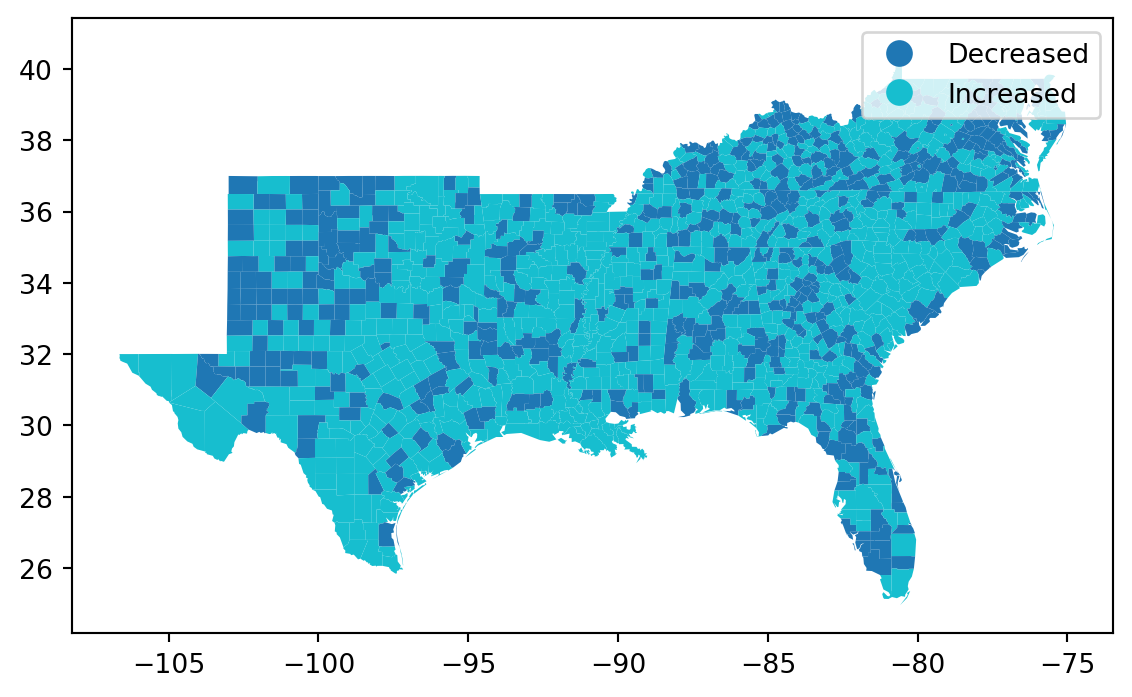

In [22]:
south_gdf.plot(column='Increased', categorical=True, legend=True);

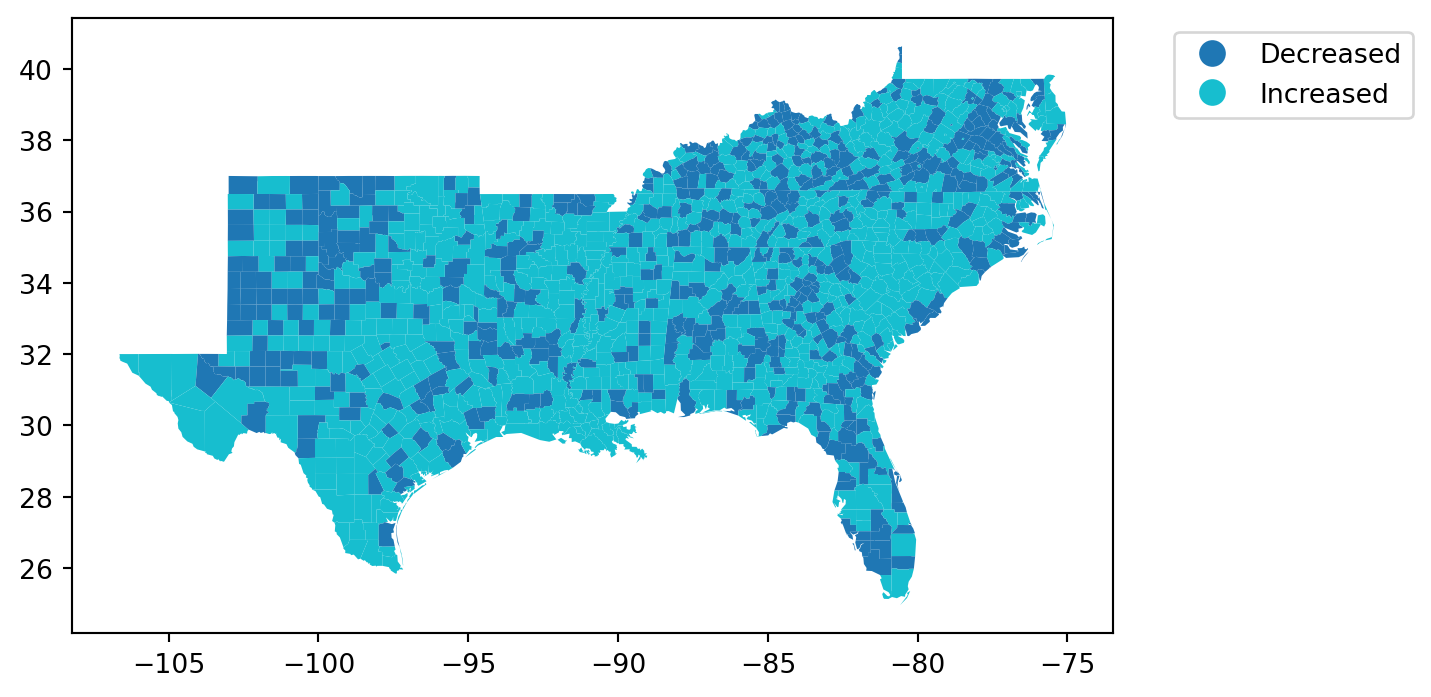

In [23]:
south_gdf.plot(column='Increased', categorical=True, legend=True,
               legend_kwds={'bbox_to_anchor': (1.3, 1)});

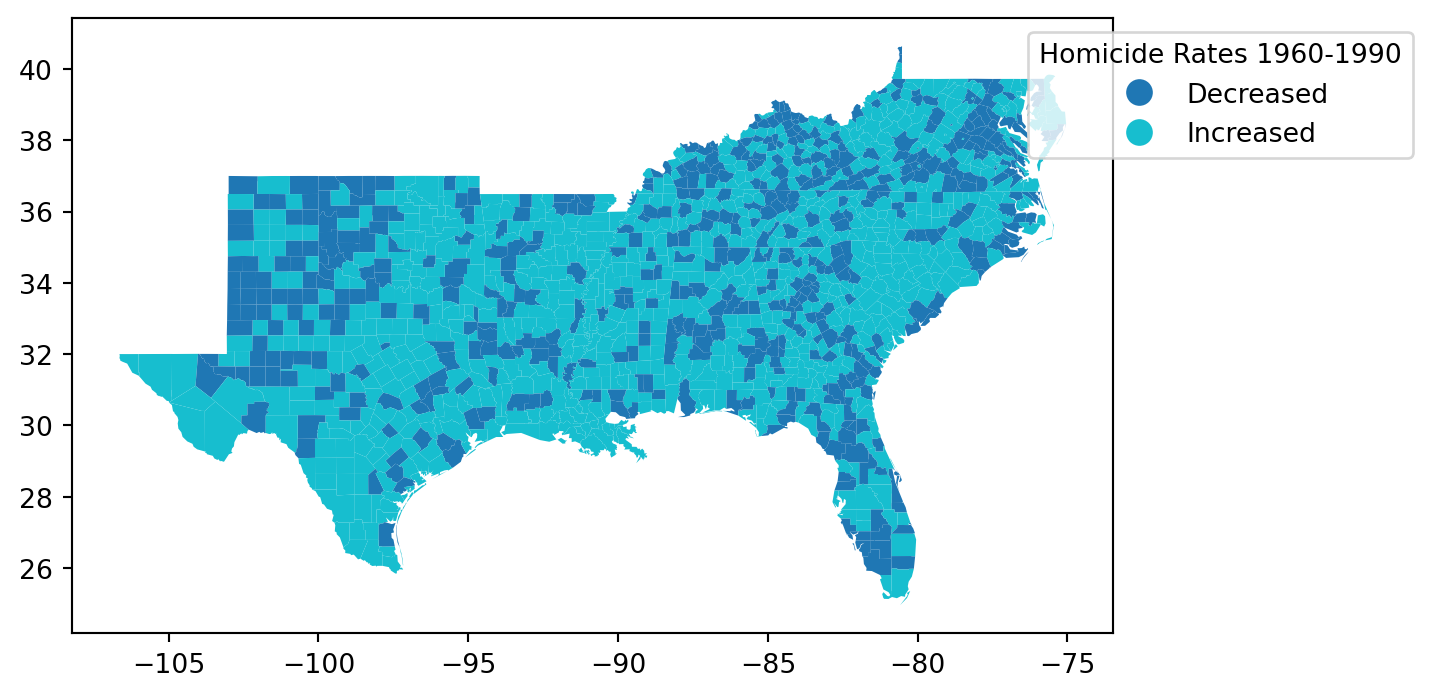

In [24]:
south_gdf.plot(column='Increased', categorical=True, legend=True,
               legend_kwds={'bbox_to_anchor': (1.3, 1),
                           'title':'Homicide Rates 1960-1990'},
           );

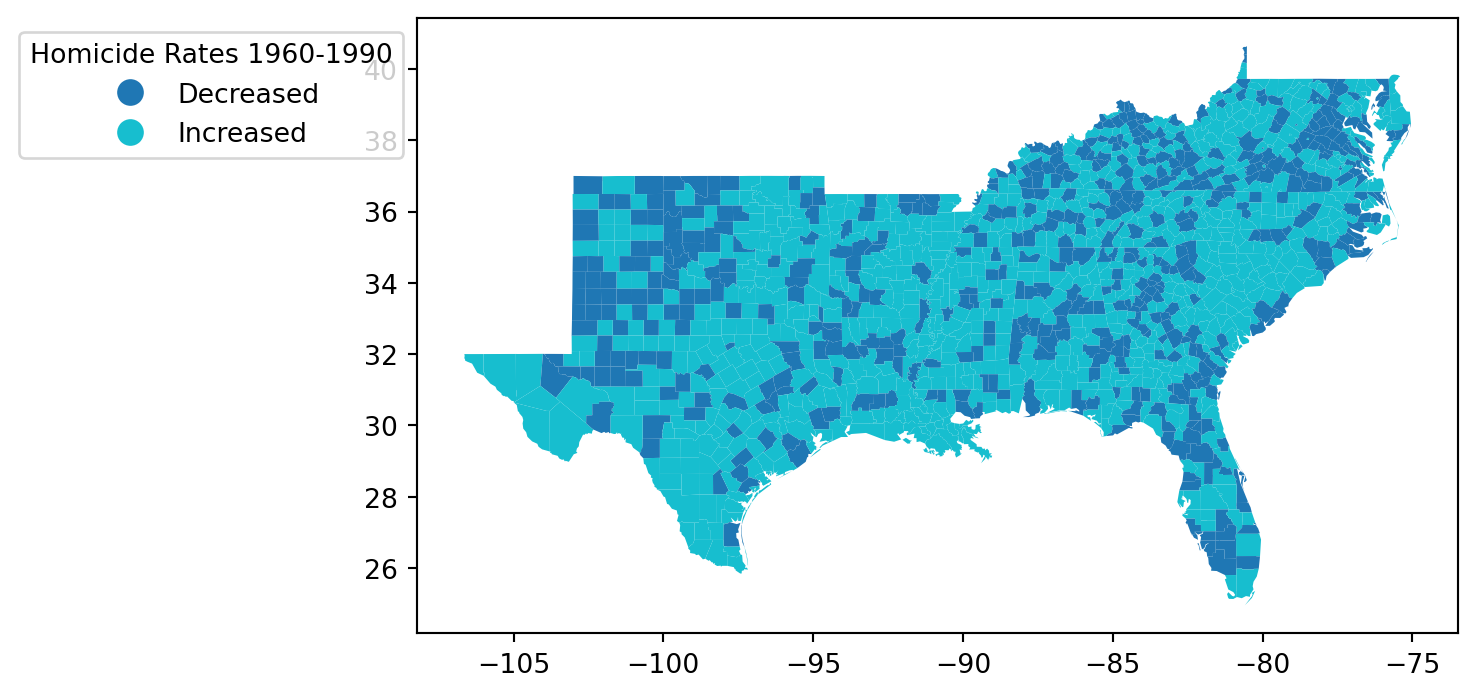

In [25]:
south_gdf.plot(column='Increased', categorical=True, legend=True,
               legend_kwds={'bbox_to_anchor': (0, 1),
                           'title':'Homicide Rates 1960-1990'},
           );

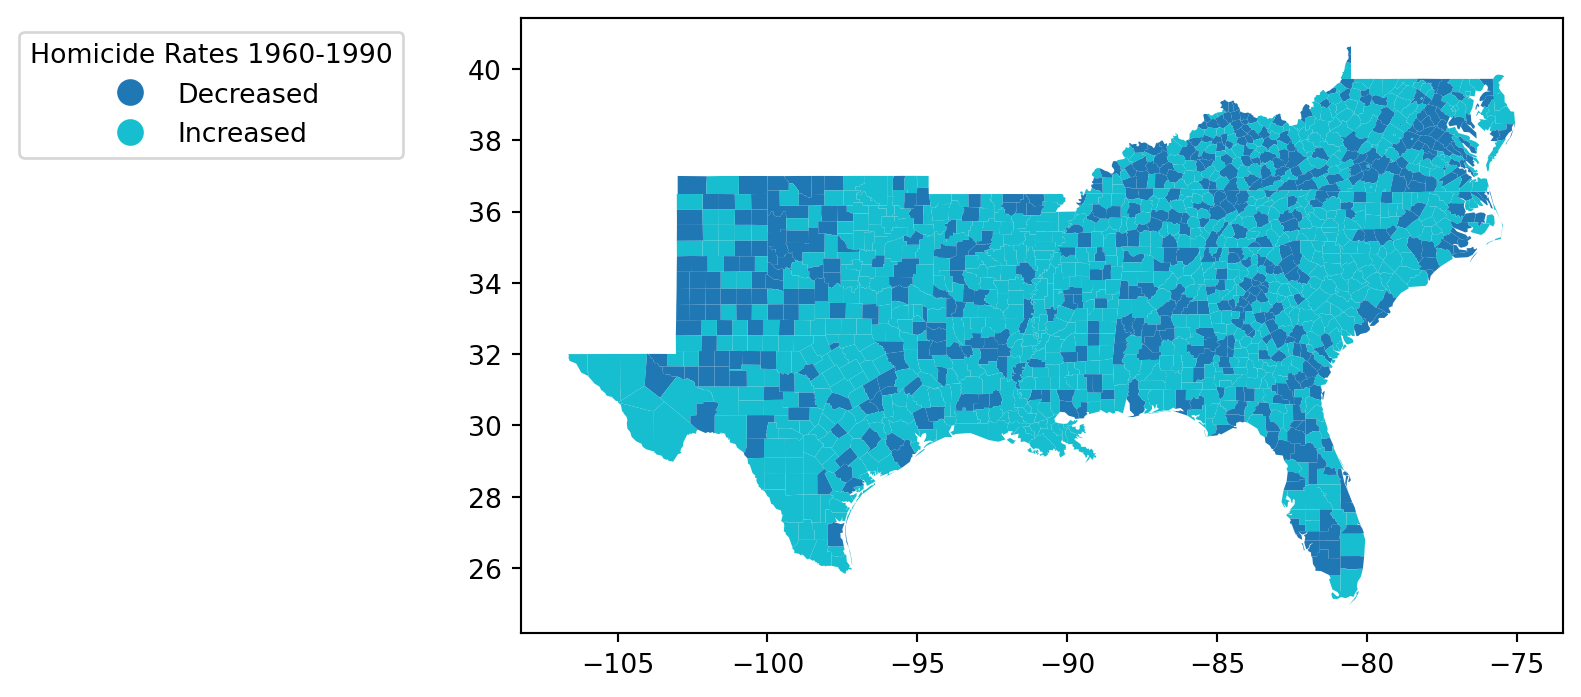

In [26]:
south_gdf.plot(column='Increased', categorical=True, legend=True,
               legend_kwds={'bbox_to_anchor': (-0.1, 1),
                           'title':'Homicide Rates 1960-1990'},
           );

#### Qualitative Color Scheme

<Axes: >

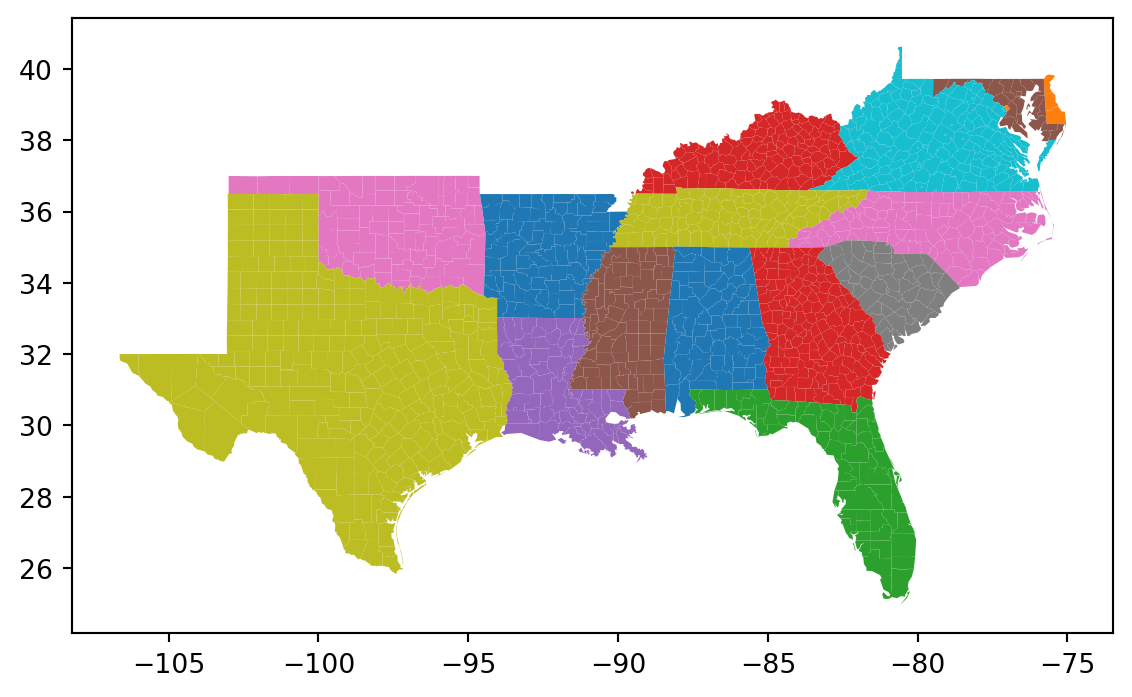

In [27]:
south_gdf.plot(column='STATE_NAME', categorical=True)

<Axes: >

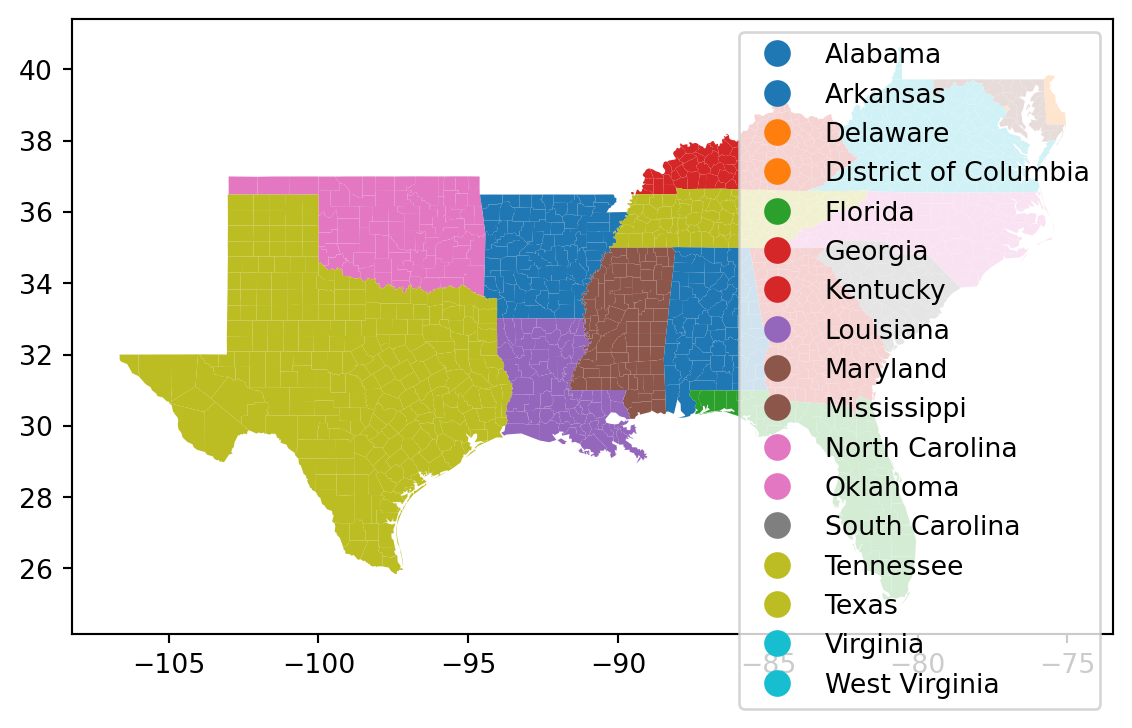

In [28]:
south_gdf.plot(column='STATE_NAME', categorical=True, legend=True)